In [1]:
import BR_ML as br
import pandas as pd

In [2]:
print(br.__version__)

0.0.1: Advanced Analytics Framework of BR Distribuidora


In [3]:
pequim = pd.read_csv('datasets/BeijingPM20100101_20151231.csv')

In [4]:
pequim.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

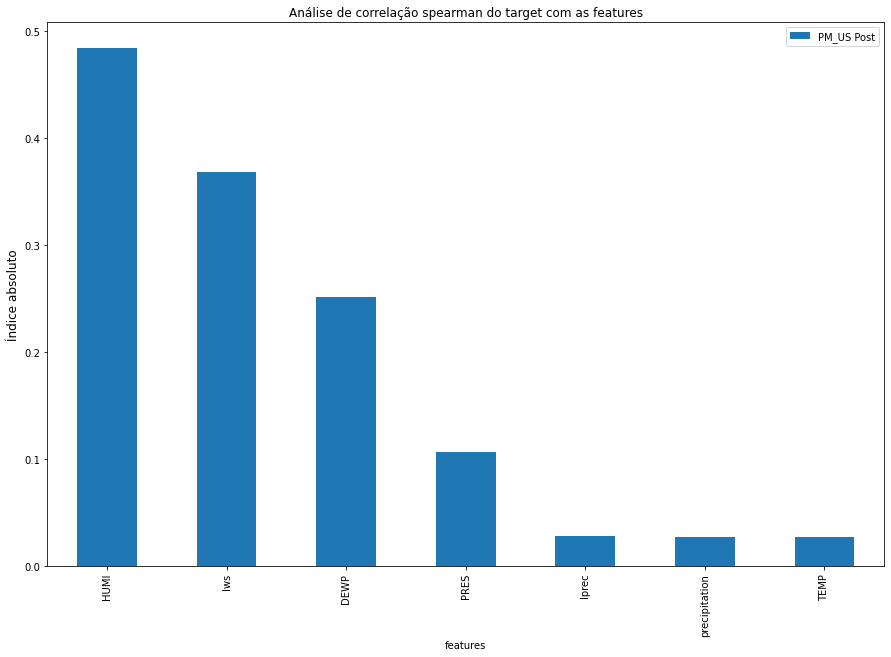

In [5]:
br.data_pre_investigation.grafico_barras_corr_variaveis_continuas(pequim, 'PM_US Post', ['DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'])

In [ ]:
data_pre_investigation.

In [ ]:
data_pre_investigation.

In [ ]:
data_pre_investigation.

In [ ]:
--version pandas

In [ ]:
pequim.corr()